In [1]:
import pandas as pd
import numpy as np

In [16]:
ds= pd.read_excel('HSM data file kib.xlsx').dropna()

# recoding the roles 
role=['Business Owner', 
      'Business Owner & Community Leader', 
      'Business Owner & Community Leader & EM',
      'Business Owner & Workforce' ,
      'NRPO Ockracoke' ,
      'Workforce & Citizen']
new_code=['BW', 
          'BWC', 
          'BWCEM',
          'BWW',
          'NRPO',
          'WC']

ds['Role_acrn'] = ds['Role'].replace(role, new_code)

# recoding BF 
d_cd= [1]
n_cd= [2]
ds ['dc_2f']= ds['BF'].replace(d_cd, n_cd)

# addubg BB and BF
ds ['dc_b_f'] = ds['dc_2f'] + ds['BB']

# adding Def. and Imp. for Huristic
ds['Huristic']= ds['Defenese_pc'] + ds['Impression_pc']

ds.head()


,Interview_no,Role,Defense,Impression,Accuracy,Total,Defenese_pc,Impression_pc,Accuarcy_pc,BB,BF,risk_1NHg_2Hg,Role_acrn,dc_2f,dc_b_f,Huristic
0,H1,Business Owner,7,3,9,19,36.842105,15.789474,47.368421,0,1,2.0,BW,2,2,52.631579
2,H11,Business Owner & Community Leader,7,2,7,16,43.750000,12.500000,43.750000,1,1,2.0,BWC,2,3,56.250000
4,H15,Business Owner,15,17,2,34,44.117647,50.000000,5.882353,1,1,2.0,BW,2,3,94.117647
5,H17,Business Owner & Community Leader & EM,18,14,18,50,36.000000,28.000000,36.000000,0,1,2.0,BWCEM,2,2,64.000000
6,H19,Business Owner,13,15,11,39,33.333333,38.461538,28.205128,0,1,2.0,BW,2,2,71.794872


In [30]:
print (ds)

   Interview_no                                    Role  Defense  Impression  \
0            H1                          Business Owner        7           3   
2           H11       Business Owner & Community Leader        7           2   
4           H15                          Business Owner       15          17   
5           H17  Business Owner & Community Leader & EM       18          14   
6           H19                          Business Owner       13          15   
7            H2                          Business Owner        5           3   
8           H20                          Business Owner        1           1   
9            H6                          Business Owner       13           4   
10           H8       Business Owner & Community Leader        4           3   
11           O1                          Business Owner        1           7   
15          O21       Business Owner & Community Leader        6          15   
16          O22       Business Owner & C

In [17]:

from sklearn.preprocessing import MinMaxScaler 

# selecting columns of data 
dtns= ds[['Defense','Impression','Accuracy','Total','Defenese_pc','Impression_pc','Accuarcy_pc','risk_1NHg_2Hg', 'dc_b_f', 'Huristic']]

# normalization of the columns 
scale= MinMaxScaler()

nrdt= pd.DataFrame(scale.fit_transform(dtns), columns= dtns.columns, index= dtns.index)

nrdt.head()


,Defense,Impression,Accuracy,Total,Defenese_pc,Impression_pc,Accuarcy_pc,risk_1NHg_2Hg,dc_b_f,Huristic
0,0.352941,0.176471,0.45,0.354167,0.714912,0.180451,0.521053,1.0,0.666667,0.478947
2,0.352941,0.117647,0.35,0.291667,0.864583,0.142857,0.481250,1.0,1.000000,0.518750
4,0.823529,1.000000,0.10,0.666667,0.872549,0.571429,0.064706,1.0,1.000000,0.935294
5,1.000000,0.823529,0.90,1.000000,0.696667,0.320000,0.396000,1.0,0.666667,0.604000
6,0.705882,0.882353,0.55,0.770833,0.638889,0.439560,0.310256,1.0,0.666667,0.689744


In [17]:
print(nrdt['dc_b_f'])

0     0.666667
2     1.000000
4     1.000000
5     0.666667
6     0.666667
7     1.000000
8     0.000000
9     0.666667
10    1.000000
11    0.333333
15    0.666667
16    1.000000
17    1.000000
18    0.333333
19    0.333333
20    0.333333
21    1.000000
22    1.000000
24    0.333333
25    1.000000
26    1.000000
27    0.666667
Name: dc_b_f, dtype: float64


In [3]:
dfm= pd.DataFrame(ds)
newdf= dfm.drop(['Role', 'Interview_no'], axis=1)

dtf= newdf.dropna()

In [ ]:
print(ds)

In [ ]:
dtf.head()

In [ ]:
matrix = newdf.corr().round(2)
print(matrix)

/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_4357/1413569425.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = newdf.corr().round(2)


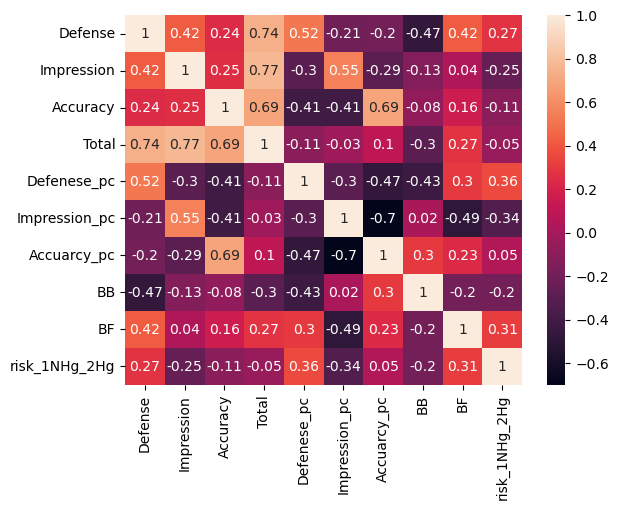

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = newdf.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_4357/1297666615.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corm= ndf.corr().round(2)


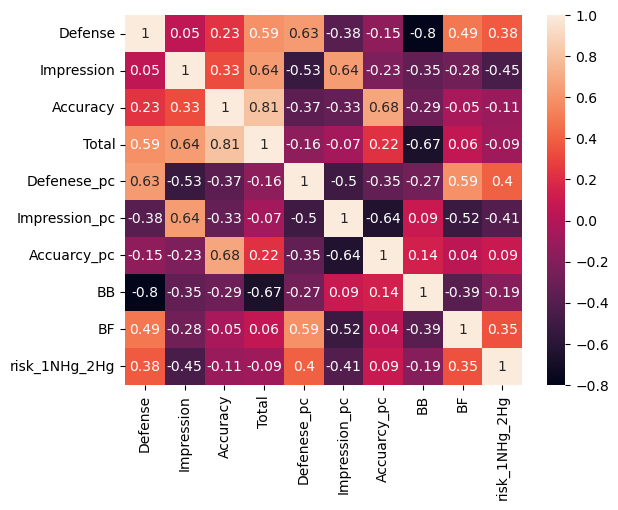

In [8]:
from sklearn.utils import resample 
import seaborn as sns
import matplotlib.pyplot as plt

n_samp = 10000
for i in range(n_samp):
    ndf = resample(newdf, replace=True)
    
corm= ndf.corr().round(2)
sns.heatmap(corm, annot= True)
plt.show()

In [9]:
print(ndf)

    Defense  Impression  Accuracy  Total  Defenese_pc  Impression_pc  \
7         5           3         2     10    50.000000      30.000000   
2         7           2         7     16    43.750000      12.500000   
16        6           2         4     12    50.000000      16.666667   
18        4           4         6     14    28.571429      28.571429   
21        1          13        12     26     3.846154      50.000000   
11        1           7         0      8    12.500000      87.500000   
20        4           9         8     21    19.047619      42.857143   
2         7           2         7     16    43.750000      12.500000   
16        6           2         4     12    50.000000      16.666667   
18        4           4         6     14    28.571429      28.571429   
17        1           0        10     11     9.090909       0.000000   
24        1          10         3     14     7.142857      71.428571   
9        13           4        11     28    46.428571      14.28

In [10]:
newdf.describe()

,Defense,Impression,Accuracy,Total,Defenese_pc,Impression_pc,Accuarcy_pc,BB,BF,risk_1NHg_2Hg
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5.500000,6.818182,7.545455,19.863636,28.691709,34.643029,36.665262,0.681818,0.727273,1.727273
std,4.973741,5.386370,5.396006,11.527588,17.032420,21.133770,22.796948,0.476731,0.455842,0.455842
min,1.000000,0.000000,0.000000,2.000000,3.846154,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.250000,3.000000,3.250000,12.000000,13.221154,16.008772,22.321429,0.000000,0.250000,1.250000
50%,4.000000,4.000000,7.500000,17.500000,30.952381,29.285714,37.047619,1.000000,1.000000,2.000000
75%,6.750000,11.500000,10.750000,27.500000,44.025735,50.000000,45.552885,1.000000,1.000000,2.000000
max,18.000000,17.000000,20.000000,50.000000,50.000000,87.500000,90.909091,1.000000,1.000000,2.000000


In [11]:
from sklearn.utils import resample 
import seaborn as sns
import matplotlib.pyplot as plt

n_samp = 10000
for i in range(n_samp):
    stk_bst = resample(ds, replace=True)

In [12]:
pd.crosstab(index=ds['Role'], columns='Defenese_pc')

col_0,Defenese_pc
Role,
Business Owner,9
Business Owner & Community Leader,5
Business Owner & Community Leader & EM,1
Business Owner & Workforce,1
NRPO Ockracoke,4
Workforce & Citizen,2


NameError: name 'order' is not defined

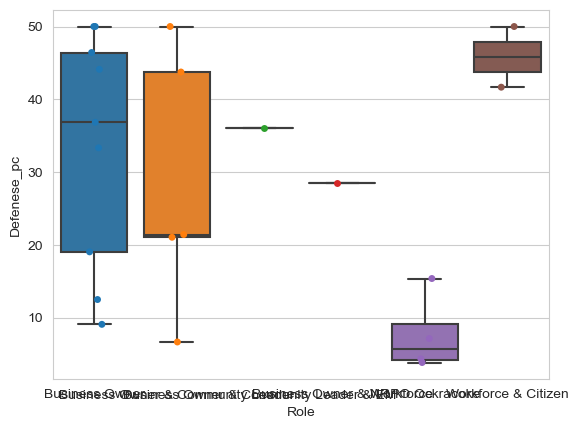

In [15]:
import seaborn as sns
from statannotations.Annotator import Annotator
sns.set_style('whitegrid')
ax= sns.boxplot(x= "Role", y= "Defenese_pc", data= ds)
ax= sns.stripplot(x= "Role", y= "Defenese_pc", data= ds)

pairs=[("Business Owner", "Business Owner & EM"), 
                               ("Business Owner & Community Leader & EM", "Business Owner & EM"), 
                               ("Business Owner & Workforce", "NRPO Ockracoke")]

annotator = Annotator(ax, pairs, data=ds, x= "Role", y= "Defenese_pc", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()



In [16]:
print(ds)

   Interview_no                                    Role  Defense  Impression  \
0            H1                          Business Owner        7           3   
2           H11       Business Owner & Community Leader        7           2   
4           H15                          Business Owner       15          17   
5           H17  Business Owner & Community Leader & EM       18          14   
6           H19                          Business Owner       13          15   
7            H2                          Business Owner        5           3   
8           H20                          Business Owner        1           1   
9            H6                          Business Owner       13           4   
10           H8       Business Owner & Community Leader        4           3   
11           O1                          Business Owner        1           7   
15          O21       Business Owner & Community Leader        6          15   
16          O22       Business Owner & C

In [ ]:
import seaborn as sns
from statannotations.Annotator import Annotator


order = ['Business Owner',
'Business Owner & Community Leader',
'Business Owner & Community Leader & EM',
'Business Owner & EM',
'Business Owner & Workforce',
'NRPO Ockracoke']

x= "Role" 
y= "Defenese_pc"

ax= sns.boxplot(x= x, y= y, data= ds, order= order)

annotator = Annotator(ax, pairs, data=ds, x= x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()


In [ ]:
sns.boxplot(data=ds, x= "Role", y= "Accuarcy_pc", hue= 'Role')

<Axes: xlabel='Role', ylabel='Defenese_pc'>

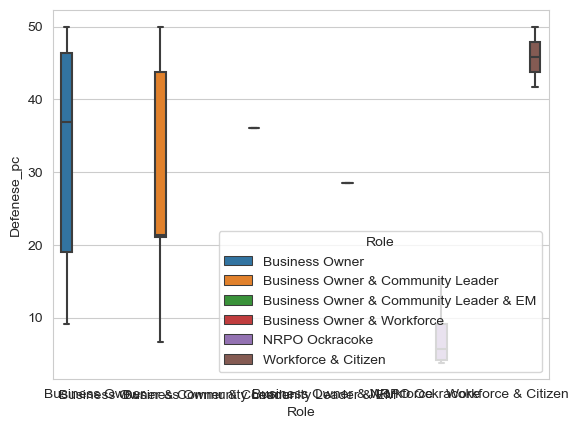

In [19]:
sns.boxplot(data=ds, x= "Role", y= 'Defenese_pc', hue= 'Role')

In [13]:
pd.crosstab(index=ds['Role_acrn'], columns='Defenese_pc')

col_0,Defenese_pc
Role_acrn,
BW,9
BWC,5
BWCEM,1
BWW,1
NRPO,4
WC,2


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler 9feature_rang=(0,1))



SyntaxError: invalid decimal literal (3410292123.py, line 2)

In [13]:
# splitting data
from sklearn.model_selection import train_test_split 
x= np.array(nrdt[['Defenese_pc',
                'Impression_pc',
                'Accuarcy_pc']])
y= np.array(nrdt[['dc_b_f']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

from keras.models import Sequential
from keras.layers import Dense, LSTM
model= Sequential()
model.add(LSTM(40, return_sequences=True, activation= 'relu', input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(25, activation= 'relu', return_sequences=False))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 40)             6720      
                                                                 
 lstm_5 (LSTM)               (None, 25)                6600      
                                                                 
 dense_4 (Dense)             (None, 5)                 130       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 13,456
Trainable params: 13,456
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(format(xtrain.shape))

(19, 3)


In [14]:
# training the model
model.compile(optimizer='adam', loss='mse',  metrics=['accuracy'])
model.fit(xtrain, ytrain, batch_size=10, epochs=50, 
            shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 3ms/step - loss: 0.1445 - accuracy: 0.4737
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.4737
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.4737
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.4737
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.4737
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.4737
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.4737
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 0.4737
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.4737
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.4737
Epoch 11/200
2/2 [===========

In [ ]:
print("Decision BB_BF")
a = float(input("defense: "))
b = float(input("impr: "))
c = float(input("accur: "))

features = np.array([[a, b, c]])
pred_m= model.predict(features)
print("bf pred = ", (pred_m))


Decision BF


defense:  .


ValueError: could not convert string to float: '.'

NEW LSTM FOR HURISTIC VS SYSTMATIC

In [25]:
# Huristic vs Systematic 

# splitting data
from sklearn.model_selection import train_test_split 
X= np.array(nrdt[['Huristic',
                'Accuarcy_pc']])
Y= np.array(nrdt[['dc_b_f']])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, 
                                                test_size=0.10, 
                                                random_state=42)

from keras.models import Sequential
from keras.layers import Dense, LSTM
model= Sequential()
model.add(LSTM(60, return_sequences=True, activation= 'relu', input_shape= (Xtrain.shape[1], 1)))
model.add(LSTM(35, activation= 'relu', return_sequences=False))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 60)             14880     
                                                                 
 lstm_9 (LSTM)               (None, 35)                13440     
                                                                 
 dense_8 (Dense)             (None, 5)                 180       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 28,506
Trainable params: 28,506
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(format(Xtrain.shape))

(19, 2)


In [26]:
# training the model
model.compile(optimizer='adam', loss='mse',  metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=10, epochs=100, 
            shuffle=True)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.1439 - accuracy: 0.4737
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.4737
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.4737
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.4737
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.4737
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.4737
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1362 - accuracy: 0.4737
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.4737
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.4737
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.4737
Epoch 11/100
2/2 [===========

In [28]:
print("Decision BB_BF")
a = float(input("HURI: "))
B = float(input("SYS: "))

features = np.array([[a, b]])
pred_HS= model.predict(features)
print("bf pred = ", (pred_HS))

Decision BB_BF


HURI:  .1
SYS:  .8


1/1 [==============================] - 0s 15ms/step
bf pred =  [[0.7124797]]
